# Linear Regression

    1. Analysis of LR using dummy variables
    
    2. Coefficient of determination
    
    3. Cost function
    
    4. Coding linear regression from scratch

## 1. Simple linear regression

### 1. analysis of LR using dummy variables

In [2]:
import numpy as np

In [34]:
data=np.loadtxt('data.csv',delimiter=',')
data[:5]

array([[32.50234527, 31.70700585],
       [53.42680403, 68.77759598],
       [61.53035803, 62.5623823 ],
       [47.47563963, 71.54663223],
       [59.81320787, 87.23092513]])

In [9]:
data.shape

(100, 2)

In [35]:
x=data[:,0].reshape(-1,1)
y=data[:,1]

In [36]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3)

In [16]:
from sklearn.linear_model import LinearRegression
alg1=LinearRegression()
alg1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
alg1.coef_

array([1.42707565])

In [52]:
alg1.intercept_

3.2539817342302655

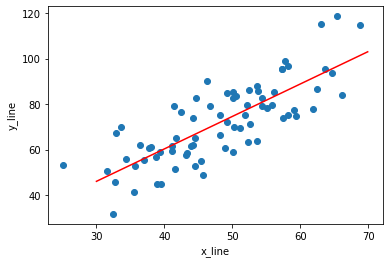

In [28]:
import matplotlib.pyplot as plt
b=alg1.coef_[0]
a=alg1.intercept_
x_line=np.arange(30,70,0.1)
y_line=a+b*x_line
plt.xlabel('x_line')
plt.ylabel('y_line')
plt.plot(x_line,y_line,c='r')

train_1d=x_train.reshape(75)
plt.scatter(x_train,y_train)
plt.show()

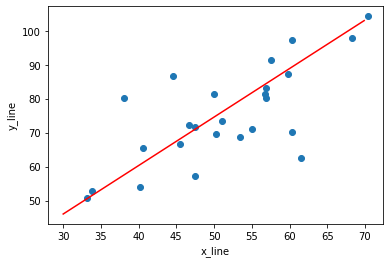

In [29]:
b=alg1.coef_[0]
a=alg1.intercept_
x_line=np.arange(30,70,0.1)
y_line=a+b*x_line
plt.xlabel('x_line')
plt.ylabel('y_line')
plt.plot(x_line,y_line,c='r')

train_1d=x_test.reshape(25)
plt.scatter(x_test,y_test)
plt.show()

### 2. coefficient of determination

R^2= 1-(sum((ytrue-ypre)^2)/(sum((ytrue-ymean)^2)),techniqually the R2 can be negative when your predition is worsen than using mean to predict

In [31]:
score_test=alg1.score(x_test,y_test)
score_test

0.4329397721812871

In [32]:
score_train=alg1.score(x_train,y_train)
score_train

0.6264954371833222

### 3. cost function

cost (a,b) =sun(ytrue-(a+b*x))^2

    1) b_partial_deriavative= alpha cost/alpha b=0

       a_partial_deriavative= alpha cost/alpha a=0

    2) m=[(x*y).mean()-x.mean()*y.mean()]/[(x*x).mean()-x.mean()*x.mean()]

       c=y.mean()-m*x.mean()

### 4. coding linear regression

In [38]:
from sklearn import model_selection
import numpy as np
data=np.loadtxt('data.csv',delimiter=',')
x=data[:,0]
y=data[:,1]
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3)

In [49]:
def fit(x_train,y_train):
    numerator=(x_train*y_train).mean()-x_train.mean()*y_train.mean()
    denominator=(x_train**2).mean()-x_train.mean()**2
    m=numerator/denominator
    c=y_train.mean()-m*x_train.mean()
    return m,c

def predict(x,m,c):
    return m*x+c

def score(y_true,y_predict):
    u=((y_true-y_predict)**2).sum()
    v=((y_true-y_true.mean())**2).sum()
    return 1-u/v

def cost(x,y,m,c):
    return ((y-(m*x+c))**2).mean()

In [50]:
m,c=fit(x_train,y_train)

#test data
y_test_predict=predict(x_test,m,c)
print('test score:',score(y_test,y_test_predict))

#train data
y_train_predict=predict(x_train,m,c)
print('train score:',score(y_train,y_train_predict))

#parameters
print("M,C:",m,c) 

#cost
print('cost on training data:',cost(x_train,y_train,m,c))

test score: 0.6661356842408019
train score: 0.5611796841983796
M,C: 1.2764927194002713 10.884049471300784
cost on training data: 115.45408657925063


## 2. Multivariable Regression 

In [1]:
from sklearn import datasets
boston=datasets.load_boston()
x=boston.data
y=boston.target

In [2]:
import pandas as pd
df=pd.DataFrame(x)
df.columns=boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,random_state=0)

In [4]:
from sklearn.linear_model import LinearRegression
alg1=LinearRegression()
alg1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
y_predict=alg1.predict(x_test)
train_score=alg1.score(x_train,y_train)
test_score=alg1.score(x_test,y_test)
print(train_score)
print(test_score)

0.7697699488741149
0.6354638433202111


**Add another feature, and can see the result improved**

In [6]:
df['age_age']=df.AGE**2

In [7]:
x2=df.values
x2_train,x2_test,y2_train,y2_test=model_selection.train_test_split(x2,y,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
alg2=LinearRegression()
alg2.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_predict=alg2.predict(x2_test)
train2_score=alg2.score(x2_train,y2_train)
test2_score=alg2.score(x2_test,y2_test)
print(train_score)
print(test_score)

0.7697699488741149
0.6354638433202111
